In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
is_cuda=False
if torch.cuda.is_available():
    is_cuda = True
print(is_cuda)
device = "cuda" if torch.cuda.is_available() else "cpu"
print("using {} device".format(device))

False
using cpu device


# Dataset

In [73]:
transformation = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST('data/',train=True,transform=transformation,download=True)
test_dataset = datasets.MNIST('data/',train=False,transform=transformation,download=True)

train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=128,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=128,shuffle=True)

In [74]:
len(train_loader)

469

In [75]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(images.shape)
## images[0]

torch.Size([128, 1, 28, 28])


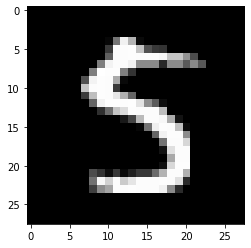

In [76]:
digit = images[0][0]
plt.imshow(digit, cmap = 'gray')
plt.show()

# Model

In [77]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,32, kernel_size = 3)
        self.conv2 = nn.Conv2d(32,64, kernel_size = 3)
        self.conv3 = nn.Conv2d(64,64, kernel_size = 3)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(576,64)
        self.fc2 = nn.Linear(64,10)
    def forward(self,x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x)

In [78]:
model = Net()
if is_cuda:
    model.cuda()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [79]:
print(model.forward)

<bound method Net.forward of Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=576, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)>


# Define Train & Inference 

In [80]:
# Training
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # forward
        pred = model(X)
        loss = loss_fn(pred,y)
        
        # backward 
        optimizer.zero_grad()
        loss.backward()
        
        # update weights
        optimizer.step()
        
        if batch %100 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f"loss: {loss:>7f}[{current:>5d}/{size:5d}]")

In [81]:
# Testing
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():           # data 추적 X (inference)
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred,y).item()
            correct += (pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# Train

In [82]:
epochs = 5
for t in range(epochs):
    print(f"Epochs {t+1} \n")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epochs 1 

loss: 2.301043[    0/60000]


<ipython-input-77-ff1da966f3e6>:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


loss: 2.278916[12800/60000]
loss: 2.246586[25600/60000]
loss: 1.737397[38400/60000]
loss: 0.635253[51200/60000]
test Error: 
 Accuracy: 84.3%, Avg loss: 0.497084 

Epochs 2 

loss: 0.577704[    0/60000]
loss: 0.303544[12800/60000]
loss: 0.433257[25600/60000]
loss: 0.288564[38400/60000]
loss: 0.210045[51200/60000]
test Error: 
 Accuracy: 90.3%, Avg loss: 0.302502 

Epochs 3 

loss: 0.310425[    0/60000]
loss: 0.352538[12800/60000]
loss: 0.234307[25600/60000]
loss: 0.211240[38400/60000]
loss: 0.216073[51200/60000]
test Error: 
 Accuracy: 94.5%, Avg loss: 0.183339 

Epochs 4 

loss: 0.207256[    0/60000]
loss: 0.212312[12800/60000]
loss: 0.141016[25600/60000]
loss: 0.277284[38400/60000]
loss: 0.278368[51200/60000]
test Error: 
 Accuracy: 95.7%, Avg loss: 0.139161 

Epochs 5 

loss: 0.110113[    0/60000]
loss: 0.128667[12800/60000]
loss: 0.175172[25600/60000]
loss: 0.215797[38400/60000]
loss: 0.069492[51200/60000]
test Error: 
 Accuracy: 96.8%, Avg loss: 0.107269 

Done!
